# A player has a 30% chance of hitting the UFO with any single shot. If the player takes 10 shots at the UFO during a game, what is the probability that they hit it exactly 10 times?

The percentage will stay at 10% meaning that is not an stimation is a guess. 

In one simulation, the spaceship will shoot 10 times, indicating how many shots were successful and how many missed. If a shot successfully hits a UFO, it will be considered a success; if it misses, it will be regarded as a failure.

In [1]:
!pip install ale-py
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install gymnasium[accept-rom-licence]

ERROR: Invalid requirement: "'gymnasium[atari]'": Expected package name at the start of dependency specifier
    'gymnasium[atari]'
    ^


In [2]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

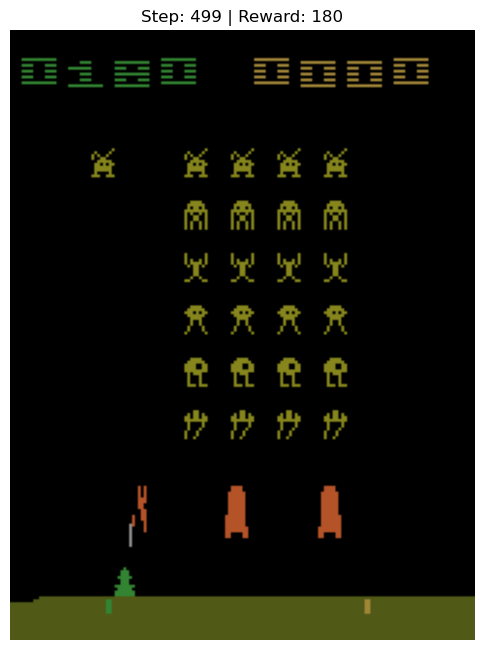

In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment
env = gym.make('ALE/SpaceInvaders-v5', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Clear and update display
    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    
    display(fig)
    
    # Add delay to make it visible (adjust this value)
    time.sleep(0.03)  # 30ms delay = ~33 fps
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()

Game 1: Shots=84, Hits=12, Accuracy=14.29%
Game 2: Shots=90, Hits=11, Accuracy=12.22%
Game 3: Shots=80, Hits=9, Accuracy=11.25%
Game 4: Shots=82, Hits=7, Accuracy=8.54%
Game 5: Shots=64, Hits=5, Accuracy=7.81%
Game 6: Shots=74, Hits=6, Accuracy=8.11%
Game 7: Shots=48, Hits=6, Accuracy=12.50%
Game 8: Shots=51, Hits=5, Accuracy=9.80%
Game 9: Shots=59, Hits=8, Accuracy=13.56%
Game 10: Shots=80, Hits=11, Accuracy=13.75%
Game 11: Shots=99, Hits=11, Accuracy=11.11%
Game 12: Shots=81, Hits=6, Accuracy=7.41%
Game 13: Shots=80, Hits=13, Accuracy=16.25%
Game 14: Shots=77, Hits=9, Accuracy=11.69%
Game 15: Shots=89, Hits=12, Accuracy=13.48%
Game 16: Shots=79, Hits=8, Accuracy=10.13%
Game 17: Shots=76, Hits=5, Accuracy=6.58%
Game 18: Shots=45, Hits=3, Accuracy=6.67%
Game 19: Shots=83, Hits=8, Accuracy=9.64%
Game 20: Shots=72, Hits=7, Accuracy=9.72%
Game 21: Shots=88, Hits=12, Accuracy=13.64%
Game 22: Shots=70, Hits=11, Accuracy=15.71%
Game 23: Shots=80, Hits=10, Accuracy=12.50%
Game 24: Shots=98, H

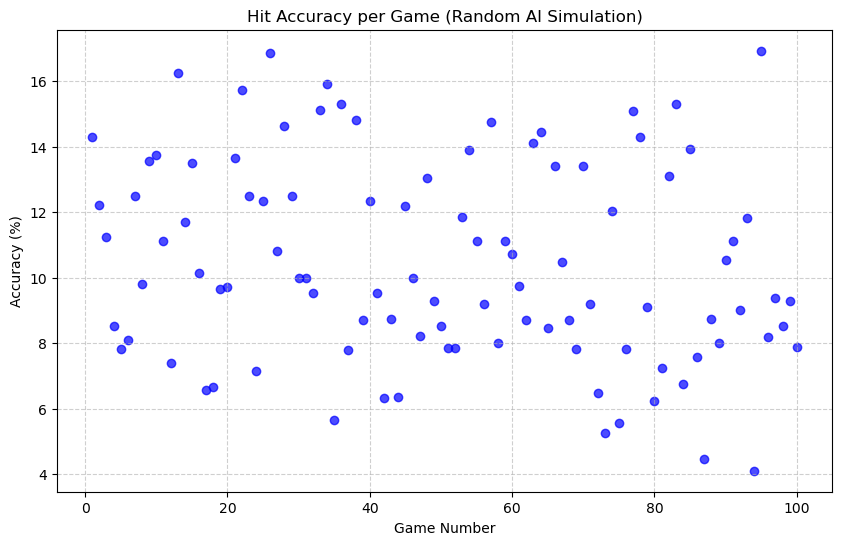

In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# Create the Space Invaders environment
env = gym.make('ALE/SpaceInvaders-v5', render_mode=None)

# Number of simulation runs
num_simulations = 100
steps_per_game = 500

# Track totals
game_accuracies = []
total_shots = 0
total_hits = 0

# The "FIRE" action is usually action 1 in SpaceInvaders-v5
FIRE_ACTION = 1

for episode in range(num_simulations):
    observation, info = env.reset()
    episode_shots = 0
    episode_hits = 0
    total_reward = 0

    for step in range(steps_per_game):
        # Choose random action (AI plays randomly)
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Count "fire" actions
        if action == FIRE_ACTION:
            episode_shots += 1
        
        # If reward is positive, assume a hit
        if reward > 0:
            episode_hits += 1

        if terminated or truncated:
            break
    
    # Avoid division by zero
    if episode_shots > 0:
        accuracy = (episode_hits / episode_shots) * 100
    else:
        accuracy = 0

    game_accuracies.append(accuracy)
    total_shots += episode_shots
    total_hits += episode_hits

    print(f"Game {episode+1}: Shots={episode_shots}, Hits={episode_hits}, Accuracy={accuracy:.2f}%")

# Calculate overall hit accuracy
if total_shots > 0:
    hit_percentage = (total_hits / total_shots) * 100
else:
    hit_percentage = 0

print("\n===== Simulation Results =====")
print(f"Total Games Simulated: {num_simulations}")
print(f"Total Shots Fired: {total_shots}")
print(f"Total Hits (Reward Events): {total_hits}")
print(f"Average Hit Accuracy: {hit_percentage:.2f}%")

# ==== Scatter plot ====
plt.figure(figsize=(10, 6))
plt.scatter(range(1, num_simulations + 1), game_accuracies, color='blue', alpha=0.7)
plt.title("Hit Accuracy per Game (Random AI Simulation)")
plt.xlabel("Game Number")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

env.close()

Game 1: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 2: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 3: Shots Fired = 10, Hits = 1, Accuracy = 10.00%
Game 4: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 5: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 6: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 7: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 8: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 9: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 10: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 11: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 12: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 13: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 14: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 15: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 16: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 17: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 18: Shots Fired = 10, Hits = 0, Accuracy = 0.00%
Game 19: Shots Fired = 10, Hits = 0,

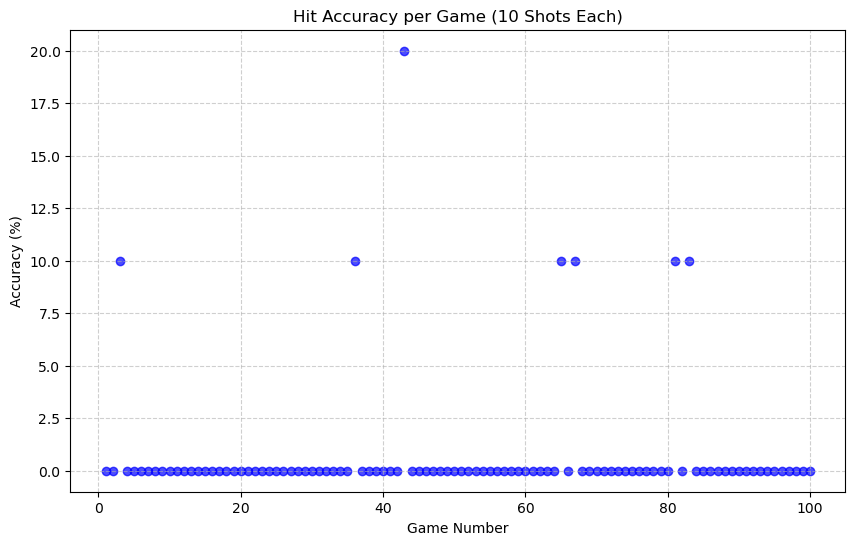

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# Create the Space Invaders environment
env = gym.make('ALE/SpaceInvaders-v5', render_mode=None)

# Number of simulation runs
num_simulations = 100

# The "FIRE" action is usually action 1 in SpaceInvaders-v5
FIRE_ACTION = 1

# Track game accuracy
game_accuracies = []

for episode in range(num_simulations):
    observation, info = env.reset()
    shots_fired = 0
    hits = 0
    total_reward = 0
    steps = 0

    while shots_fired < 10:
        steps += 1
        # Choose random action
        action = env.action_space.sample()

        # Count shots
        if action == FIRE_ACTION:
            shots_fired += 1

        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Count hits (reward > 0)
        if reward > 0 and action == FIRE_ACTION:
            hits += 1

        # Reset if game over
        if terminated or truncated:
            observation, info = env.reset()
    
    # Calculate accuracy for this game
    accuracy = (hits / shots_fired) * 100
    game_accuracies.append(accuracy)

    print(f"Game {episode+1}: Shots Fired = {shots_fired}, Hits = {hits}, Accuracy = {accuracy:.2f}%")

# Overall statistics
average_accuracy = np.mean(game_accuracies)
print("\n===== Simulation Summary =====")
print(f"Total Games Simulated: {num_simulations}")
print(f"Average Accuracy: {average_accuracy:.2f}%")

# Scatter plot of each game's accuracy
plt.figure(figsize=(10, 6))
plt.scatter(range(1, num_simulations + 1), game_accuracies, color='blue', alpha=0.7)
plt.title("Hit Accuracy per Game (10 Shots Each)")
plt.xlabel("Game Number")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

env.close()

Assuming a shooting accuracy of 30%, the theoretical probability of hitting all 10 shots is 0.3^10 = 0.00059%. After 100 simulations, none resulted in 10 out of 10 hits (0%), indicating that this event is extremely unlikely to occur.